# 파이썬에서 데이터분석을 위한 필수 Library
### (1) Pandas
- 2008년 금융데이터 분석용으로 출발
- 통계와 데이터과학, 머신러닝에서 사용

### (2) Numpy
- 파이썬 기반 수치해석 Library
- 선형대수 (Linear Algebra) 연산에 필요한 다차원 배열 연산을 수행하는 다양한 함수 제공

### (3) Matplotlib
- 그래프나 차트 등 그래픽으로 표현하는 파이썬 도구

### (4) SciPy
- 과학용 연산에 필요한 다양한 패키지를 모아놓은 Library
- 미적분, 선형대수, 행렬연산, 방정식
- 딥러닝 이후로 별로 안 씀

### (5) scikit-learn
- 머신러닝 학습을 위한 파이썬 라이브러리
- SciPy를 대체
- 군집, Clustering -> 객관식 (분류, Classification) -> 주관식 (회귀, Regression analysis)


---
### DataFrame
- Pandas에서 사용하는 기본 데이터 (DF는 Pandas)
- 데이터프레임을 정의할 때는 2차원 리스트를 매개변수로 전달

In [83]:
# 모듈 불러오기
import pandas as pd

In [84]:
# List로 DataFrame 만들기

# df = pd.DataFrame(
#     [10,20,30],
#     # 한 row에 10, 20, 30
#     [40,50,60],
#     [70,80,90]
# )
# error: 3X3 df이지만 []로 감싸주지 않으면 한 뭉치로 취급함
df = pd.DataFrame([
    [10,20,30],
    [40,50,60],
    [70,80,90]
]
)
df

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90


In [85]:
# 위의 에러 이해하기 쉽게 보기
data1 = [10,20,30]
data2 = [40,50,60]
data3 = [70,80,90]
df2 = pd.DataFrame([data1,data2,data3])
df2

,0,1,2
0,10,20,30
1,40,50,60
2,70,80,90


In [86]:
# DataFrame에서 값 추출하기
# loc, slicing(:)을 사용
df.loc[:0]

,0,1,2
0,10,20,30


In [87]:
# 행 기준으로 추출하기
df.loc[0,:]

0    10
1    20
2    30
Name: 0, dtype: int64

In [88]:
# 0번 열과 1번 열 추출하기
df.loc[:,[0,1]]

,0,1
0,10,20
1,40,50
2,70,80


In [89]:
# 이렇게도 가능 (불러올 행, 열이 많아질 때)
df.loc[:,0:1]

,0,1
0,10,20
1,40,50
2,70,80


---
# Series
- 1차원 데이터

In [90]:
s = pd.Series([1.0,3.0,5.0,7.0,9.0])
s

0    1.0
1    3.0
2    5.0
3    7.0
4    9.0
dtype: float64

In [91]:
print(s[0])
print(s[0:3])

1.0
0    1.0
1    3.0
2    5.0
dtype: float64


---
### 1. List로 DataFrame 만들기
### 2. Dicrionary로 DataFrame 만들기


In [92]:
# 1. list -> df
# 몸무게, 키, 타입
# 행 순위로 삽입됨
tbl = pd.DataFrame([
    [80.0,70.3,65.5,45.9,51.2],
    [170,180,155,143,154],
    ["f","n","n","t","t"]
]
)
tbl

,0,1,2,3,4
0,80.0,70.3,65.5,45.9,51.2
1,170,180,155,143,154
2,f,n,n,t,t


In [93]:
# 2. dic -> df
# 몸무게, 키, 타입
# 열 순위로 삽입됨
# 컬럼 지정할 수 있다는 장점
tbl2 = pd.DataFrame({
    "weight":[80.0,70.3,65.5,45.9,51.2],
    "height":[170,180,155,143,154],
    "type":["f","n","n","t","t"]
}
)
tbl2

,weight,height,type
0,80.0,170,f
1,70.3,180,n
2,65.5,155,n
3,45.9,143,t
4,51.2,154,t


In [94]:
print(type(tbl))
print(type(tbl2))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [95]:
# weight 컬럼만 출력하기
tbl2.loc[:,'weight']

0    80.0
1    70.3
2    65.5
3    45.9
4    51.2
Name: weight, dtype: float64

In [96]:
# weight와 height만 출력하기
tbl2.loc[:,['weight','height']]

,weight,height
0,80.0,170
1,70.3,180
2,65.5,155
3,45.9,143
4,51.2,154


In [97]:
# 2~3번째 행 출력하기
tbl2.loc[[2,3],:]

,weight,height,type
2,65.5,155,n
3,45.9,143,t


In [98]:
# 3번째 이후의 행 출력하기
tbl2.loc[3:,:]

,weight,height,type
3,45.9,143,t
4,51.2,154,t


### 행과 열 기준이 아닌 Data를 비교해서 원하는 값 추출

In [99]:
# 키가 160이상인 Data를 출력하기
tbl2[tbl2.height >= 160]
# loc를 사용하려면 행과 열이 들어가야 한다.

,weight,height,type
0,80.0,170,f
1,70.3,180,n


In [100]:
# type이 n인 것만 출력하기
tbl2[tbl2.type == 'n']

,weight,height,type
1,70.3,180,n
2,65.5,155,n


In [101]:
tbl2[(tbl2['type'] == 'n') & (tbl2['height'] == 180)]

,weight,height,type
1,70.3,180,n


---
### 정렬의 오름차순과 내림차순

In [102]:
# height를 기준으로 오름차순
tbl2.sort_values(by='height')

,weight,height,type
3,45.9,143,t
4,51.2,154,t
2,65.5,155,n
0,80.0,170,f
1,70.3,180,n


In [103]:
# height를 기준으로 내림차순
tbl2.sort_values(by='height', ascending=False)

,weight,height,type
1,70.3,180,n
0,80.0,170,f
2,65.5,155,n
4,51.2,154,t
3,45.9,143,t


---
### 행과 열의 회전

In [104]:
tbl2.T
# R에서 괄호는 Python에서 .~~
tbl2.head()

,weight,height,type
0,80.0,170,f
1,70.3,180,n
2,65.5,155,n
3,45.9,143,t
4,51.2,154,t


---
# Numpy를 이용한 데이터 조작

In [105]:
import numpy as np

In [106]:
# 10개의 0으로 된 float32 자료형 데이터 생성
np01 = np.zeros(10, dtype=np.float32)
np01
# array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [107]:
# np01 = np.ones(10, dtype=np.float32)
# np01
# array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)
# np.twos는 없음

In [108]:
# 10개의 연속된 uint64 (unsigned (양수) int 64) 자료형 데이터 생성
np02 = np.arange(10,dtype=np.uint64)
np02
# array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint64)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint64)

In [109]:
# np02의 값을 3배 증가하기
np02 *= 3
np02
# numpy: 숫자 계산이 편하다~

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27], dtype=uint64)

In [110]:
# np02의 평균 구하기
np.mean(np02)

13.5

In [111]:
# np02의 합계 구하기
np.sum(np02)

135

In [112]:
# 중앙값 구하기
np.median(np02)

13.5

- np02.median()은 사용할 수 없음 (python 기본함수가 아니므로)
- np.~~를 사용하는 게 좋다

In [113]:
# 분산 구하기
np.var(np02)

74.25

In [114]:
# 표준편차 구하기
np.std(np02)

8.616843969807043

In [115]:
# 분산의 제곱근을 구하면 표준편차인가?
np.sqrt(np.var(np02)) == np.std(np02)

True

In [116]:
# 표준편차에 제곱을 하면 분산인가?
np.std(np02) ** 2 == np.var(np02)

True

In [117]:
# power로도 가능
np.power(np.std(np02),2) == np.var(np02)

True

In [118]:
# 데이터프레임을 행렬로 변환하기
tbl2

,weight,height,type
0,80.0,170,f
1,70.3,180,n
2,65.5,155,n
3,45.9,143,t
4,51.2,154,t


In [119]:
tbl2.values
# dtype = object
# 데이터프레임에 .values만 붙여주면 됨

array([[80.0, 170, 'f'],
       [70.3, 180, 'n'],
       [65.5, 155, 'n'],
       [45.9, 143, 't'],
       [51.2, 154, 't']], dtype=object)

---
### Pandas와 Matplotlib을 이용한 시각화

In [120]:
# !pip install matplotlib

In [121]:
import matplotlib.pyplot as plt

In [122]:
names = pd.read_csv("../Data/Baby_Names_1880-2014.csv") # header = 0 (있음), header = 1 (없음)

In [123]:
names.head(10)

,name,gender,births,year,id
0,Mary,F,7065,1880,1
1,Anna,F,2604,1880,2
2,Emma,F,2003,1880,3
3,Elizabeth,F,1939,1880,4
4,Minnie,F,1746,1880,5
5,Margaret,F,1578,1880,6
6,Ida,F,1472,1880,7
7,Alice,F,1414,1880,8
8,Bertha,F,1320,1880,9
9,Sarah,F,1288,1880,10


In [124]:
names.tail(10)

,name,gender,births,year,id
1825378,Ziyang,M,5,2014,13968
1825379,Zmarion,M,5,2014,13969
1825380,Zo,M,5,2014,13970
1825381,Zyeir,M,5,2014,13971
1825382,Zyel,M,5,2014,13972
1825383,Zykeem,M,5,2014,13973
1825384,Zymeer,M,5,2014,13974
1825385,Zymiere,M,5,2014,13975
1825386,Zyran,M,5,2014,13976
1825387,Zyrin,M,5,2014,13977


In [125]:
# 전체 개수
names.count()

name      1825388
gender    1825388
births    1825388
year      1825388
id        1825388
dtype: int64

In [126]:
# 컬럼 하나의 개수
names.gender.count()

1825388

### pivot을 이용하여 각 이름의 count를 년도별 합계로 그룹화하여 집계하기

In [127]:
# 성별 분류하기

total_births = names.pivot_table('births',index='year',columns='gender',aggfunc=sum)
# births의 누적 sum을 구함, year 별로, gender 기준으로 그룹화
total_births

gender,F,M
year,,
1880,90993,110491
1881,91954,100745
1882,107850,113683
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


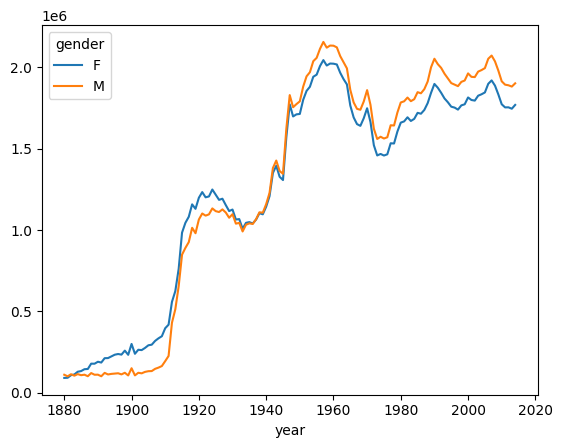

In [129]:
total_births.plot()
plt.show()

In [130]:
# 그래프의 가로 세로 비율 적용
plt.rcParams['figure.figsize'] = (14,6)

<AxesSubplot: title={'center': 'Total Births by Gender and Year'}, xlabel='year'>

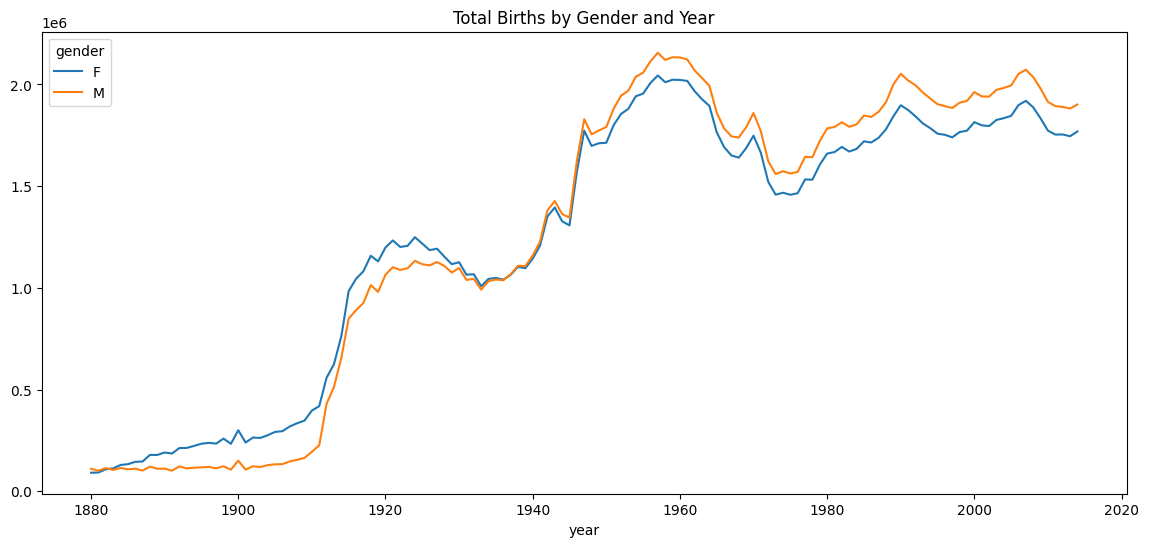

In [133]:
total_births.plot(title = 'Total Births by Gender and Year')

### name, gender, births, year만으로 새로운 csv 저장하기

In [135]:
names2 = pd.DataFrame(names, columns=['name','year','gender','births'])
names2.head()

,name,year,gender,births
0,Mary,1880,F,7065
1,Anna,1880,F,2604
2,Emma,1880,F,2003
3,Elizabeth,1880,F,1939
4,Minnie,1880,F,1746


In [136]:
names2.to_csv("../Data/birth_names.csv", index=False, header=True)

In [138]:
pd.read_csv("../Data/birth_names.csv").head()

,name,year,gender,births
0,Mary,1880,F,7065
1,Anna,1880,F,2604
2,Emma,1880,F,2003
3,Elizabeth,1880,F,1939
4,Minnie,1880,F,1746
